# Machine learning Spring 2018 Assignment 5
You are given a data set with 5000 handwritten digits and their corresponding
labels. Each training example is a 20 pixel by 20 pixel grayscale image of the
digit. Each pixel is represented by a number indicating the grayscale intensity at
that location. Thus, your neural network will have 400 inputs.

## Import the necessary packages

In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
import random

## Load the data

data loaded in shape of (5000, 400)


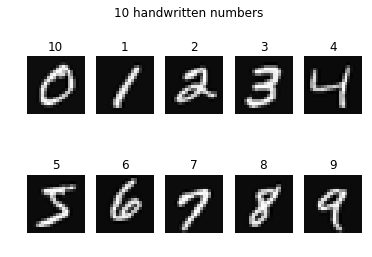

W_1 is loaded in shape: (25, 401)
W_2 is loaded in shape: (10, 26)


In [2]:
## load image data
infile = open('/Users/xg7/Desktop/teachingstuff/MachineLearning2018/assigment/Assignment5/ps5_data.csv','r')
img_data = infile.read().strip().split('\n')
img = [map(float,a.strip().split(',')) for a in img_data]
pixels = []
for p in img:
    pixels += p
data = np.reshape(pixels,(5000,400))
print('data loaded in shape of', data.shape)
## loda labels
infile = open('/Users/xg7/Desktop/teachingstuff/MachineLearning2018/assigment/Assignment5/ps5_data-labels.csv','r')
img_label = infile.read().strip().split('\n')
Label_ = [map(int,a.strip().split(',')) for a in img_label]
Label = []
for l in Label_:
    Label += l
    

## visualizing 
plt.figure()
plt.suptitle('10 handwritten numbers')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(Label[i*500])
    plt.imshow(np.reshape(data[i*500],(20,20),order='F'), cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

##load weights
infile = open('/Users/xg7/Desktop/teachingstuff/MachineLearning2018/assigment/Assignment5/ps5_theta1.csv','r')
theta1 = infile.read().strip().split('\n')
W_1_ = [map(float,a.strip().split(',')) for a in theta1]
W_1 = []
for w in W_1_:
    W_1 += w
W_1 = np.reshape(W_1, (25, 401))
print("W_1 is loaded in shape:", W_1.shape)

infile = open('/Users/xg7/Desktop/teachingstuff/MachineLearning2018/assigment/Assignment5/ps5_theta2.csv','r')
theta2 = infile.read().strip().split('\n')
W_2_ = [map(float,a.strip().split(',')) for a in theta2]
W_2 = []
for w in W_2_:
    W_2 += w
W_2 = np.reshape(W_2, (10, 26))
print("W_2 is loaded in shape:", W_2.shape)

## Build a network from scratch

### A unit in the hidden layer

In [3]:
def hidden_layer_unit(x, w):
    # x: a vector in size of 400 x 1
    # w: a vector in size of 401 x 1 (including bias as w[0])
    z = w[0]
    for i in range(len(x)):
        z += x[i]*w[i+1]
    e = math.exp(-z)
    a = 1/(1+e)
    return a

### The softmax

In [4]:
def softmax(z):
    # z: a vector in size of 10 x 1
    e = []
    prob = []
    for i, z_i in enumerate(z):
        try:
            e.append(math.exp(z_i))
        except OverflowError:
            prob = [0 for j in range(len(z))]
            prob[i] = 1
            return prob
    total = sum(e)
    for e_i in e:
        prob.append(e_i/total)
    return prob


### The softmax layer

In [5]:
def softmax_layer(a_h, W):
    # a_h: a vector, 25 x 1, is the output of the hidden layer
    # W: a matrix, 10 x 26, is the weights between the hidden layer and the softmax layer
    a = []
    for i, w_i in enumerate(W):
        z_j = w_i[0]
        for j, w_ij in enumerate(w_i[1:]):
            z_j += a_h[j]*w_ij
        a.append(z_j)
    return softmax(a)

### The network

In [6]:
def network(x, W_1, W_2):
    # x: a 400 x 1 vector, one sample
    # W_1: 25 x 401 matrix, the weights between input and hidden layer
    # W_2: 10 x 26 matrix, the weights between hidden and softmax layer
    a_h = []
    for w_i in W_1:
        a = hidden_layer_unit(x, w_i)
        a_h.append(a)
    p = softmax_layer(a_h, W_2)
    return p 

### The classifier

In [7]:
def img_classifier(x, W_1, W_2):
    # x: a 400 x 1 vector, one sample
    # W_1: 25 x 401 matrix, the weights between input and hidden layer
    # W_2: 10 x 26 matrix, the weights between hidden and softmax layer
    p = network(x, W_1, W_2)
    pred_label = p.index(max(p))
    return pred_label + 1 # note: 0 is labeled as 10
    

### error rate

In [8]:
def error_rate(data, W_1, W_2, Label):
    # data: the whole data set
    # W_1: 25 x 401 matrix, the weights between input and hidden layer
    # W_2: 10 x 26 matrix, the weights between hidden and softmax layer
    # label: the ground truth
    errors = 0
    for i, img in enumerate(data):
        if img_classifier(img, W_1, W_2) != Label[i]:
            errors += 1
    return errors/len(data)

### MLE loss of softmax

In [9]:
def loss_softmax(p, label):
    # p: 10 x 1 vector, the output of the softmax
    # label: scalar, the ground truth of a sample
    return -math.log(p[label-1])


def MLE_loss(data, W1, W2, Label):
    L = 0
    for i, img in enumerate(data):
        p = network(img, W1, W2)
        L += loss_softmax(p, Label[i])
    return L/len(data)

### the main routine

In [10]:
print("The error rate is:", error_rate(data, W_1,W_2, Label))
print("The MLE loss is:", MLE_loss(data, W_1, W_2, Label))

The error rate is: 0.0248
The MLE loss is: 0.08688856037475012


## For Fun: Build a network with Keras

### Import the necessary packages

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import random

### Generator data
In the data we have, the samples are listed in the order according to the classes from 0 to 9, each contains 500 examples. You need to re-arrange the data points, for example, take the first 300 for each class for training, and take the next 100 for validation, and the rest for testing.

In [71]:
## data re-arrangement
train_num_per_class = 400
train_data = np.empty([train_num_per_class*10, 400])
train_label = np.empty(train_num_per_class*10)
for i in range(10):
    train_data[i*train_num_per_class:(i+1)*train_num_per_class] = data[i*500:i*500+train_num_per_class]
    train_label[i*train_num_per_class:(i+1)*train_num_per_class] = Label[i*500:i*500+train_num_per_class]
print('train data set is in the shape:', train_data.shape)

test_num_per_class = 100
test_data = np.empty([test_num_per_class*10, 400])
test_label = np.empty(test_num_per_class*10)
for i in range(10):
    test_data[i*test_num_per_class:(i+1)*test_num_per_class] = data[i*500+train_num_per_class:i*500+train_num_per_class+test_num_per_class]
    test_label[i*test_num_per_class:(i+1)*test_num_per_class] = Label[i*500+train_num_per_class:i*500+train_num_per_class+test_num_per_class]
print('test data set is in the shape:', test_data.shape)

nb_classes = 10
train_label = train_label - 1
test_label = test_label - 1
print('The train label is in shape:', train_label.shape)
print('The test label is in shape:', test_label.shape)
#print(test_label[i*test_num_per_class:(i+1)*test_num_per_class])
#print(Label[i*500+train_num_per_class:i*500+train_num_per_class+test_num_per_class])
train_label = np_utils.to_categorical(train_label, nb_classes)
test_label = np_utils.to_categorical(test_label, nb_classes)



train data set is in the shape: (4000, 400)
test data set is in the shape: (1000, 400)
The train label is in shape: (4000,)
The test label is in shape: (1000,)


### Network construction

In [80]:
model = Sequential()
model.add(Dense(26, activation='sigmoid', use_bias=True, input_shape=(400,)))
model.add(Dense(10, activation='softmax', use_bias=True))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, decay=1e-6), metrics=['accuracy'])
model.fit(train_data, train_label, batch_size=10, shuffle=True, epochs=100, validation_data=(test_data, test_label))

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 2s 442us/step - loss: 2.2917 - acc: 0.1585 - val_loss: 2.1589 - val_acc: 0.2950
Epoch 2/100
4000/4000 [==============================] - 1s 313us/step - loss: 2.0714 - acc: 0.4193 - val_loss: 1.9793 - val_acc: 0.5020
Epoch 3/100
4000/4000 [==============================] - 1s 305us/step - loss: 1.9104 - acc: 0.5945 - val_loss: 1.8321 - val_acc: 0.6370
Epoch 4/100
4000/4000 [==============================] - 1s 302us/step - loss: 1.7735 - acc: 0.6720 - val_loss: 1.7042 - val_acc: 0.7080
Epoch 5/100
4000/4000 [==============================] - 1s 302us/step - loss: 1.6537 - acc: 0.7050 - val_loss: 1.5930 - val_acc: 0.7250
Epoch 6/100
4000/4000 [==============================] - 1s 307us/step - loss: 1.5482 - acc: 0.7260 - val_loss: 1.4945 - val_acc: 0.7340
Epoch 7/100
4000/4000 [==============================] - 1s 315us/step - loss: 1.4538 - acc: 0.7390 - val_loss: 1.4068 - val_acc: 

4000/4000 [==============================] - 1s 299us/step - loss: 0.3289 - acc: 0.9190 - val_loss: 0.3765 - val_acc: 0.8930
Epoch 61/100
4000/4000 [==============================] - 1s 302us/step - loss: 0.3256 - acc: 0.9195 - val_loss: 0.3736 - val_acc: 0.8910
Epoch 62/100
4000/4000 [==============================] - 1s 311us/step - loss: 0.3224 - acc: 0.9195 - val_loss: 0.3706 - val_acc: 0.8940
Epoch 63/100
4000/4000 [==============================] - 1s 296us/step - loss: 0.3192 - acc: 0.9197 - val_loss: 0.3681 - val_acc: 0.8960
Epoch 64/100
4000/4000 [==============================] - 1s 302us/step - loss: 0.3162 - acc: 0.9205 - val_loss: 0.3659 - val_acc: 0.8950
Epoch 65/100
4000/4000 [==============================] - 1s 305us/step - loss: 0.3133 - acc: 0.9210 - val_loss: 0.3636 - val_acc: 0.8990
Epoch 66/100
4000/4000 [==============================] - 1s 306us/step - loss: 0.3105 - acc: 0.9212 - val_loss: 0.3611 - val_acc: 0.8990
Epoch 67/100
4000/4000 [=======================

### Test

In [79]:
score = model.evaluate(test_data, test_label, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.319417184949
Test accuracy: 0.915
